In [1]:
import pandas as pd

#accessing my anime synopses
csv_file_path = "/Users/laranahcivan/Desktop/MLTA/df_top_500_anime.csv"

#reading the CSV file into a data-frame
df_top_500_anime = pd.read_csv(csv_file_path)

In [2]:
from transformers import pipeline

model_name = 'LiyaT3/sentiment-analysis-imdb-distilbert'

#ensuring the 'clean_synopsis_no_stopwords' column contains strings, so that my sentiment analysis runs properly
df_top_500_anime['clean_synopsis_no_stopwords'] = df_top_500_anime['clean_synopsis_no_stopwords'].astype(str)

#initializing the sentiment analysis pipeline with the desired model
sentiment_pipeline = pipeline(model=model_name)

#analyzing the sentiment of anime synopses
results = sentiment_pipeline(df_top_500_anime['clean_synopsis_no_stopwords'].tolist())

#printing the results
print(results)
print()

#printing the original synopses along with the predicted sentiment
for i in range(len(df_top_500_anime['clean_synopsis_no_stopwords'])):
    print("Synopsis:")
    print(df_top_500_anime['clean_synopsis_no_stopwords'].tolist()[i])
    print("Predicted Sentiment: " + str(results[i]['label']))
    print()

/Users/laranahcivan/Desktop/MLTA/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'LABEL_1', 'score': 0.7106732130050659}, {'label': 'LABEL_0', 'score': 0.687903106212616}, {'label': 'LABEL_0', 'score': 0.688554048538208}, {'label': 'LABEL_1', 'score': 0.536443829536438}, {'label': 'LABEL_0', 'score': 0.5024810433387756}, {'label': 'LABEL_1', 'score': 0.6394050717353821}, {'label': 'LABEL_0', 'score': 0.5012462139129639}, {'label': 'LABEL_0', 'score': 0.8067786693572998}, {'label': 'LABEL_0', 'score': 0.5268215537071228}, {'label': 'LABEL_1', 'score': 0.7213273048400879}, {'label': 'LABEL_1', 'score': 0.7683648467063904}, {'label': 'LABEL_1', 'score': 0.7436323761940002}, {'label': 'LABEL_0', 'score': 0.5621562004089355}, {'label': 'LABEL_1', 'score': 0.8673731088638306}, {'label': 'LABEL_0', 'score': 0.6822962164878845}, {'label': 'LABEL_1', 'score': 0.9288240075111389}, {'label': 'LABEL_1', 'score': 0.5870846509933472}, {'label': 'LABEL_0', 'score': 0.8566948771476746}, {'label': 'LABEL_1', 'score': 0.9450552463531494}, {'label': 'LABEL_1', 'score': 0.7

In [3]:
#I want to write a code that will count how many times each label appears
#firstly counting the occurrences of each label
label_counts = {'LABEL_0': 0, 'LABEL_1': 0}
for result in results:
    label_counts[result['label']] += 1

#now printing the counts
print("Number of synopses with LABEL_0:", label_counts['LABEL_0']) #represents anime with negative sentiment
print("Number of synopses with LABEL_1:", label_counts['LABEL_1']) #represents anime with positive sentiment

Number of synopses with LABEL_0: 203
Number of synopses with LABEL_1: 289


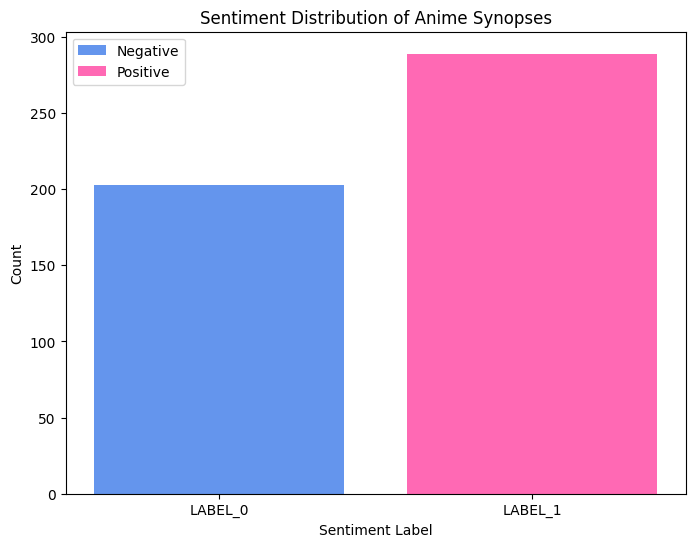

In [4]:
import matplotlib.pyplot as plt

#defining colors for bar chart
colors = ['cornflowerblue', 'hotpink']

#plotting bar graph for sentiment distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)

#adding legend
plt.legend(bars, ['Negative', 'Positive'])

plt.title('Sentiment Distribution of Anime Synopses')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()